In [6]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [7]:
fuel_data = pd.read_csv('Cobify_clean_data.csv')
fuel_data

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,temp_diff,fuel_used,cost_of_trip
0,28.0,5.0,26,21.5,12,E10,0,0,0,9.5,1.4000,2.758
1,12.0,4.2,30,21.5,13,E10,0,0,0,8.5,0.5040,0.993
2,11.2,5.5,38,21.5,15,E10,0,0,0,6.5,0.6160,1.214
3,12.9,3.9,36,21.5,14,E10,0,0,0,7.5,0.5031,0.991
4,18.5,4.5,46,21.5,15,E10,0,0,0,6.5,0.8325,1.640
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,6.5,0.5920,1.358
384,16.1,4.3,38,25.0,31,SP98,1,0,0,-6.0,0.6923,1.588
385,16.0,3.8,45,25.0,19,SP98,0,0,0,6.0,0.6080,1.395
386,15.4,4.6,42,25.0,31,SP98,1,0,0,-6.0,0.7084,1.625


In [8]:
fuel_data_corr = fuel_data.corr(numeric_only=True)

<Axes: >

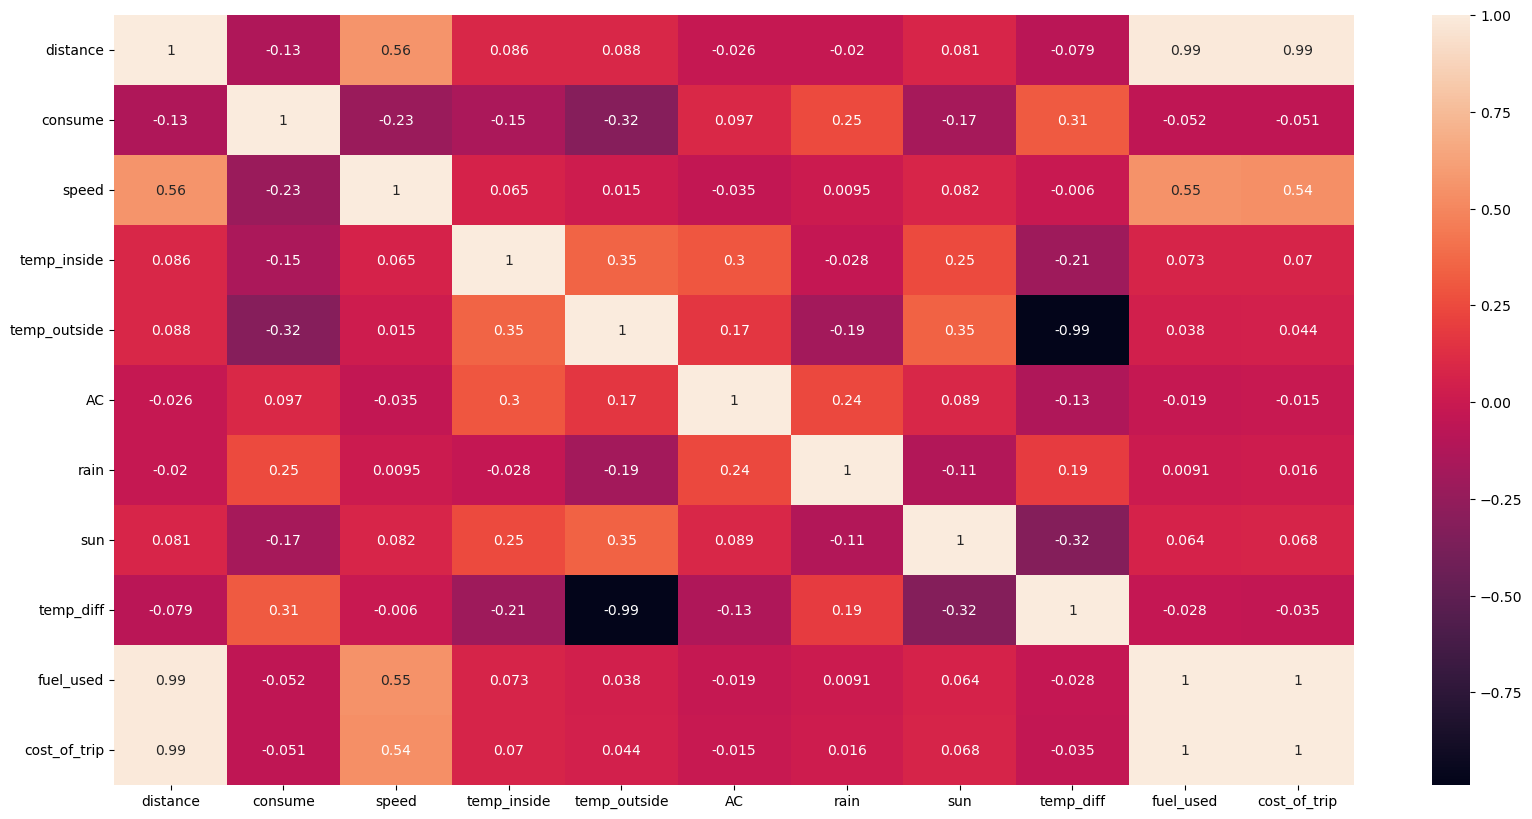

In [9]:
plt.figure(figsize=(20, 10))
sns.heatmap(fuel_data_corr, annot=True)

In [10]:
# due to multicollinearity between fuel_used and cost_of_trip, so I will drop these columns

In [11]:
# Drop collinear features
cols = ['fuel_used','cost_of_trip']
fuel_data = fuel_data.drop(cols, axis=1)
fuel_data

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,temp_diff
0,28.0,5.0,26,21.5,12,E10,0,0,0,9.5
1,12.0,4.2,30,21.5,13,E10,0,0,0,8.5
2,11.2,5.5,38,21.5,15,E10,0,0,0,6.5
3,12.9,3.9,36,21.5,14,E10,0,0,0,7.5
4,18.5,4.5,46,21.5,15,E10,0,0,0,6.5
...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,6.5
384,16.1,4.3,38,25.0,31,SP98,1,0,0,-6.0
385,16.0,3.8,45,25.0,19,SP98,0,0,0,6.0
386,15.4,4.6,42,25.0,31,SP98,1,0,0,-6.0


In [12]:
fuel_data.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,temp_diff
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.890464,11.358247,0.077320,0.123711,0.082474,10.532216
std,22.667837,1.033172,13.598524,1.035038,6.991542,0.267443,0.329677,0.275441,6.702298
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,-8.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,6.375000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,11.500000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,14.625000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,26.000000


In [13]:
# let's predict the amount of fuel consumed


In [14]:
# Linear Regression Model

In [15]:
# X-y split
X = fuel_data.drop('consume', axis=1)
y = fuel_data['consume']

In [16]:
X_cat = X.select_dtypes('object')
X_cat.head()

,gas_type
0,E10
1,E10
2,E10
3,E10
4,E10


In [17]:
X_cat_encoded = pd.get_dummies(X_cat, drop_first=True)
X_cat_encoded.head()

,gas_type_SP98
0,0
1,0
2,0
3,0
4,0


In [18]:
X_num = X.select_dtypes(np.number)
X_num.head()

,distance,speed,temp_inside,temp_outside,AC,rain,sun,temp_diff
0,28.0,26,21.5,12,0,0,0,9.5
1,12.0,30,21.5,13,0,0,0,8.5
2,11.2,38,21.5,15,0,0,0,6.5
3,12.9,36,21.5,14,0,0,0,7.5
4,18.5,46,21.5,15,0,0,0,6.5


In [19]:
from sklearn.preprocessing import StandardScaler
scaler_model = StandardScaler()
X_num_scaled = pd.DataFrame(scaler_model.fit_transform(X_num), columns=X_num.columns)
X_num_scaled.describe().style.format('{:.2f}')

,distance,speed,temp_inside,temp_outside,AC,rain,sun,temp_diff
count,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00
mean,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.81,-2.06,-2.80,-2.34,-0.29,-0.38,-0.30,-2.77
25%,-0.35,-0.68,-0.38,-0.62,-0.29,-0.38,-0.30,-0.62
50%,-0.22,-0.11,0.11,-0.19,-0.29,-0.38,-0.30,0.14
75%,-0.03,0.59,0.59,0.66,-0.29,-0.38,-0.30,0.61
max,8.68,3.54,3.49,2.81,3.45,2.66,3.34,2.31


In [20]:
# Get preprocessed dataset
X_prep = pd.concat([X_cat_encoded, X_num], axis=1)
X_prep.head()

,gas_type_SP98,distance,speed,temp_inside,temp_outside,AC,rain,sun,temp_diff
0,0,28.0,26,21.5,12,0,0,0,9.5
1,0,12.0,30,21.5,13,0,0,0,8.5
2,0,11.2,38,21.5,15,0,0,0,6.5
3,0,12.9,36,21.5,14,0,0,0,7.5
4,0,18.5,46,21.5,15,0,0,0,6.5


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=0.20, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression

# Initialize a linear regression model
model = LinearRegression()

In [23]:
# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [24]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [25]:
# Evaluate the model's performance
r2_score_value = r2_score(y_test, y_pred)
print(r2_score_value)

0.0861002435333722


In [26]:
print('Train score:', model.score(X_train, y_train))
print('Test score:', model.score(X_test, y_test))

Train score: 0.22217376278949086
Test score: 0.0861002435333722


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Absolute Error: 0.6653250250008778
Mean Squared Error: 0.8291867769039465


In [28]:
# Score is very poor. let's try some other models like Random Forest, XGBoost regresser model and KNN regressor

In [29]:
# Random Forest regresser model

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=0.20, random_state=42)

In [31]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=10, max_depth=8, random_state=1) 
                                
rf_model.fit(X_train, y_train)
print('Train score:', rf_model.score(X_train, y_train))
print('Test score:', rf_model.score(X_test, y_test))

Train score: 0.8884664177598977
Test score: 0.5237720449545875


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Create a GridSearchCV object
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and scores
print('Best Parameters:', grid_search_rf.best_params_)
print('Train score:', grid_search_rf.best_estimator_.score(X_train, y_train))
print('Test score:', grid_search_rf.best_estimator_.score(X_test, y_test))

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Train score: 0.7929154546114651
Test score: 0.5579214717793056


In [33]:
from sklearn.model_selection import cross_validate

# Use the best model obtained from grid search
best_rf_model = grid_search_rf.best_estimator_

# Initialize model and cross validate with 10 folds
results = cross_validate(best_rf_model, X_train, y_train, cv=10)
print(results.keys())

dict_keys(['fit_time', 'score_time', 'test_score'])


In [31]:
# Review test scores per validation set
results['test_score']

array([0.68183444, 0.46812092, 0.7789021 , 0.71904604, 0.58626992,
       0.07299077, 0.52848917, 0.65639046, 0.21168192, 0.15522152])

In [32]:
# Review overall test score
results['test_score'].mean()

0.4858947251958764

In [33]:
# test score is poor

In [34]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [35]:
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=0.20, random_state=42)

xgb_reg = xgb.XGBRegressor()  
xgb_reg.fit(X_train, y_train)
score = xgb_reg.score(X_test, y_test)

print('XGBoost Regressor Score:', score)

XGBoost Regressor Score: 0.41244566494647517


In [36]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
print('Train score:', knn_reg.score(X_train, y_train))
print('Test score:', knn_reg.score(X_test, y_test))

Train score: 0.6946743880288917
Test score: 0.5313146801206512


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

param_grid = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 for Manhattan distance, p=2 for Euclidean distance
}

knn_model = KNeighborsRegressor()

grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print('Best Parameters:', grid_search.best_params_)
print('Train score:', grid_search.best_estimator_.score(X_train, y_train))
print('Test score:', grid_search.best_estimator_.score(X_test, y_test))

Best Parameters: {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Train score: 0.9995763862324677
Test score: 0.5320997702072903


In [38]:
# let's try cross validation for Knn_model
from sklearn.model_selection import cross_validate

# Initialize model and cross validate with 10 folds
results = cross_validate(knn_model , X_train, y_train, cv=10)
print(results.keys())

dict_keys(['fit_time', 'score_time', 'test_score'])


In [39]:
# Review test scores per validation set
results['test_score']

array([ 0.37572067,  0.41402926,  0.81089934,  0.68916363,  0.43287599,
        0.19575844,  0.57589294,  0.55693571,  0.04663996, -0.05133482])

In [40]:
# Review overall test score
results['test_score'].mean()

0.40465811146958386

Conclusion: Random forest is performing better as compared to other model.

In [34]:
import pickle

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=0.20, random_state=42)

# Create a new RandomForestRegressor instance
rf_model = RandomForestRegressor(n_estimators=10, max_depth=8, random_state=1)

# Fit the model with training data
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=8, n_estimators=10, random_state=1)

In [35]:
# Now you can make predictions with rf_model
predictions = rf_model.predict(X_test)

In [36]:
# Create a new DataFrame with 'index' and 'Life expectancy'
output_df = pd.DataFrame({'index': X_test.index, 'consume': predictions})

In [37]:
r2_score_value = r2_score(y_test, predictions)
r2_score_value

0.5237720449545875

In [38]:
# Save the Predictions DataFrame to a CSV File
output_file_path = 'predictions.csv'
output_df.to_csv(output_file_path, index=False)
print(f"Predictions saved to {output_file_path}")

Predictions saved to predictions.csv


In [39]:
# Save the trained model using pickle
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)


In [40]:
pickle.dump(rf_model, open('rf_model.pkl', 'wb'))

In [41]:
# load the model
with open('rf_model.pkl', 'rb') as file:
    rf_model = pickle.load(file)

In [42]:
rf_model = pickle.load(open('rf_model.pkl', 'rb'))

In [43]:
!pip freeze > requirements.txt